In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
df=pd.read_csv('bhp.csv')

In [76]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


<Axes: xlabel='price_per_sqft', ylabel='Count'>

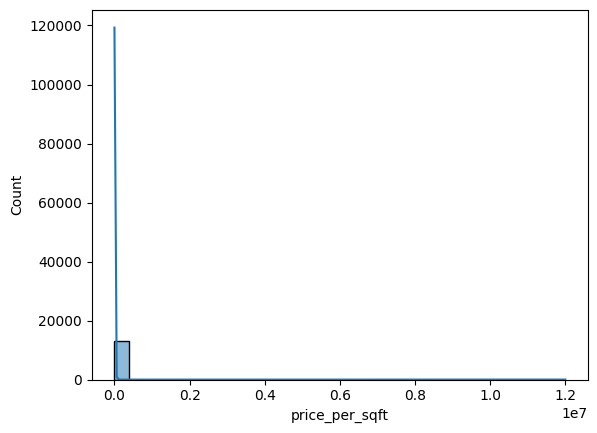

In [43]:
sns.histplot(df['price_per_sqft'],kde=True,bins=30)

#### the distribution of price tends to be skewed

In [11]:
import plotly.express as px
fig = px.box(df, y="price_per_sqft",)
fig.show()

#### there are some outliers present in the data as the max price per square feet going upto 12m and min to 267

In [14]:
df['price_per_sqft'].quantile(0.50)

5438.0

In [17]:
df['price_per_sqft'].quantile(0.97)

17857.0

#### from this we can infere 97% of our data is below 17857 per sq.ft thus it can be set as threshold

#### we can either use domain knowledge to remove outliers or IQR to remove outliers

#### Upper-fence=Q3+(1.5*IQR)
#### Lower-fence=Q1-(1.5*IQR)
#### where IQR=Q3-Q1

In [77]:
q3=df['price_per_sqft'].quantile(0.75)
q1=df['price_per_sqft'].quantile(0.25)

In [78]:
iqr=q3-q1

In [79]:
upper_fence=q3 + (1.5*(iqr))
lower_fence=q1 - (1.5*(iqr))

In [80]:
df=df[(df['price_per_sqft']>lower_fence)&(df['price_per_sqft']<upper_fence)]

In [81]:
#### after removing outliers

<Axes: xlabel='price_per_sqft', ylabel='Count'>

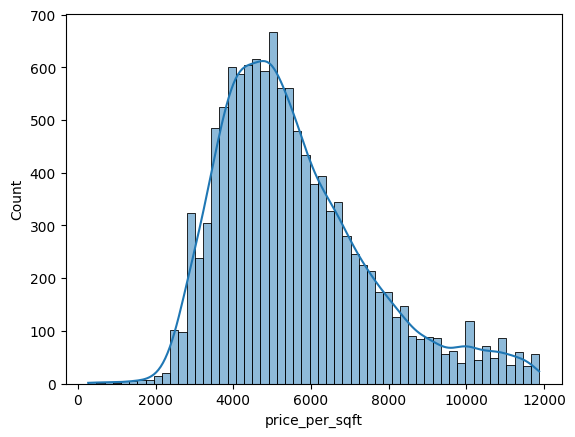

In [82]:
sns.histplot(df['price_per_sqft'],kde=True)

#### after removing outliers

#### outliers removing using Z-score
#### Z-score=(dataset-mean)/std.deviation
#### 68% of data lies with z-score of 1
#### 95% of data lies with z-score of 2
#### 99% of data lies with Z-score of 3

In [48]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [51]:
upper_limit=df['price_per_sqft'].mean() + 3*df.price_per_sqft.std()
lower_limit=df.price_per_sqft.mean() - 3*df.price_per_sqft.std()


In [52]:
upper_limit,lower_limit

(328101.8177267502, -312261.14424190175)

In [53]:
outliers=df[df['price_per_sqft']>upper_limit]

In [54]:
outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333


In [55]:
df_removed_outliers=df[df['price_per_sqft']<upper_limit]

<Axes: xlabel='price_per_sqft', ylabel='Count'>

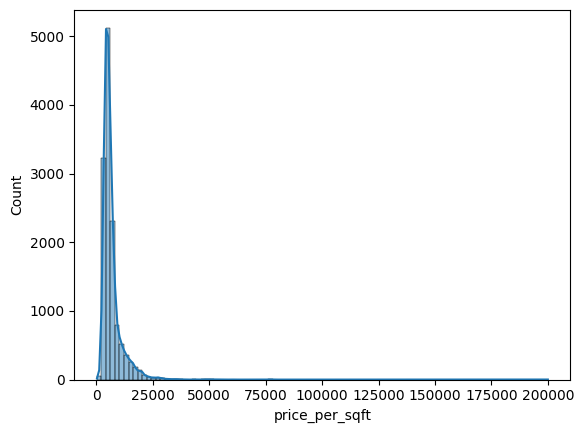

In [61]:
sns.histplot(df_removed_outliers['price_per_sqft'],kde=True,bins=100)

#### using Z-score

In [65]:
df['z-score']=((df.price_per_sqft) - (df.price_per_sqft.mean()))/df.price_per_sqft.std()

In [66]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z-score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039553
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.030970
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.033875
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.015697
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034390
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,-0.011537
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,0.029896
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.024945
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.023299


In [67]:
#### taking upto Z-score of 1

In [71]:
df_zscore_1=df[(df['z-score']<=1)&(df['z-score']>=-1)]

In [73]:
df_zscore_1.shape

(13193, 8)

In [74]:
df[df['z-score']>1]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z-score
345,other,3 Bedroom,11.0,3.0,74.0,3,672727,6.229030
1005,other,1 BHK,15.0,1.0,30.0,1,200000,1.799726
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000,5.781843
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000,112.362023
4924,other,7 BHK,5.0,7.0,115.0,7,2300000,21.476067
7575,other,1 BHK,425.0,1.0,750.0,1,176470,1.579257
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333,3.330105
